### We can use the `cohorts` module to filter down to a cohort of ICU stays

In [1]:
from chatto_transform.sessions.mimic import cohorts

### We start by making a new `Cohort`.

In [2]:
my_cohort = cohorts.Cohort()

### Next we apply various filters using widgets.

### We can start by filtering medications. In this example, select *Acetaminophen-IV* from the select box, then click *Execute*.

In [3]:
my_cohort.filter_medications()

### Now let's filter down to ICU stays that had Sodium-related labs.

### Click the select box and begin by typing the first few letters of "Sodium". Now hold down Shift while clicking all of the *Sodium* lab events in the list.

### Then click *Execute* to lock it in.

In [4]:
my_cohort.filter_labevents()

### Finally, let's filter down to ICU stays where the patient died within 12 months of hospital admission.

### Click the "Died with 12 months of hospital admission" radio button, then click *Execute*.

In [5]:
my_cohort.filter_death()

### Now that we have selected various filters for our cohort, let's get some summary info about it.

In [6]:
my_cohort.summary()

,summary
icustays,272
hadms,244
patients,236
icustay_deaths,109
hadm_deaths,153
12mo_deaths,272
first_careunits,6
last_careunits,6
avg_icu_los,7 days 22:00:14.338235
avg_hadm_los,16 days 19:10:11.911764


### We can get all the `icustay_id`'s for our cohort...

In [7]:
my_cohort.icustay_ids()

,icustay_ids
0,238824
1,215525
2,222399
3,245884
4,203723
...,...
267,247620
268,266642
269,260008
270,275466


### ...Or load all the data right here and get to analyzing.

In [8]:
df = my_cohort.load()

In [9]:
df

,row_id,subject_id,hadm_id,icustay_id,dbsource,...,first_wardid,last_wardid,intime,outtime,los
5109,5054,3977,133203,238824,metavision,...,50,50,2148-10-01 04:25:40,2148-10-03 01:17:57,1.8696
7009,7043,5544,116545,215525,metavision,...,52,52,2123-11-10 19:06:14,2123-11-15 21:07:21,5.0841
7380,6573,5171,125124,222399,metavision,...,23,23,2171-10-15 16:38:43,2171-10-20 13:50:00,4.8828
10945,10705,8426,142053,245884,metavision,...,7,7,2115-05-17 17:55:57,2115-05-21 01:37:22,3.3204
10946,10706,8426,142053,203723,metavision,...,50,50,2115-05-22 19:24:07,2115-05-25 15:08:06,2.8222
...,...,...,...,...,...,...,...,...,...,...,...
60705,59074,92775,197806,247620,metavision,...,52,52,2146-10-07 00:15:55,2146-10-08 18:24:23,1.7559
60852,57939,89419,150711,266642,metavision,...,50,50,2170-09-10 20:58:53,2170-09-16 00:35:05,5.1501
61042,59115,92907,101124,260008,metavision,...,12,12,2197-01-06 16:24:52,2197-01-09 18:31:34,3.0880
61128,60979,98344,170039,275466,metavision,...,15,15,2153-01-27 11:10:44,2153-02-22 11:41:14,26.0212


### I dunno, let's look at a plot of our cohort's lengths of stay in days

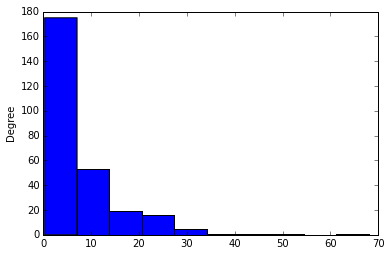

In [10]:
%matplotlib inline
df['los'].plot(kind='hist')